In [1]:
import xarray as xr
import xarray.ufuncs as xu
import matplotlib.pyplot as plt
import metpy
from metpy.interpolate import cross_section
import math
import cartopy.crs as ccrs
import numpy as np

In [2]:
data = xr.open_dataset(r'C:\Users\s1834371\Documents\PhD\SENSE_training\CALIPSO\data\extra-tropical_cyclone.nc')#, decode_times=False)
data = data.metpy.parse_cf().squeeze()
#print(data)

start = (62.0, -34.0)
end = (51, -42)
cross = cross_section(data, start, end).set_coords(('latitude', 'longitude'))

windspeed = xu.sqrt(cross.u**2+cross.v**2)
print(cross)
#print(data.r)
#print(data1)

c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing m

<xarray.Dataset>
Dimensions:    (level: 37, index: 100)
Coordinates:
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time       datetime64[ns] 2018-02-13T05:00:00
    metpy_crs  object Projection: latitude_longitude
    longitude  (index) float64 -34.0 -34.11 -34.22 ... -41.88 -41.94 -42.0
    latitude   (index) float64 62.0 61.89 61.78 61.68 ... 51.34 51.23 51.11 51.0
  * index      (index) int32 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Data variables:
    cc         (level, index) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    r          (level, index) float64 0.001198 0.001198 0.001198 ... 68.22 68.02
    ciwc       (level, index) float64 1.455e-11 1.455e-11 ... 1.455e-11
    clwc       (level, index) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    t          (level, index) float64 247.2 247.2 247.2 ... 278.6 278.5 278.5
    u          (level, index) float64 -24.88 -24.73 -24.58 ... 17.18 17.34 17.47
    v          (level, inde

c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:562: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
c:\Users\s1834371\Miniconda3\envs\GFSTS_base\lib\site-packages\xarray\core\missing.py:563: FutureWarning: Passing m

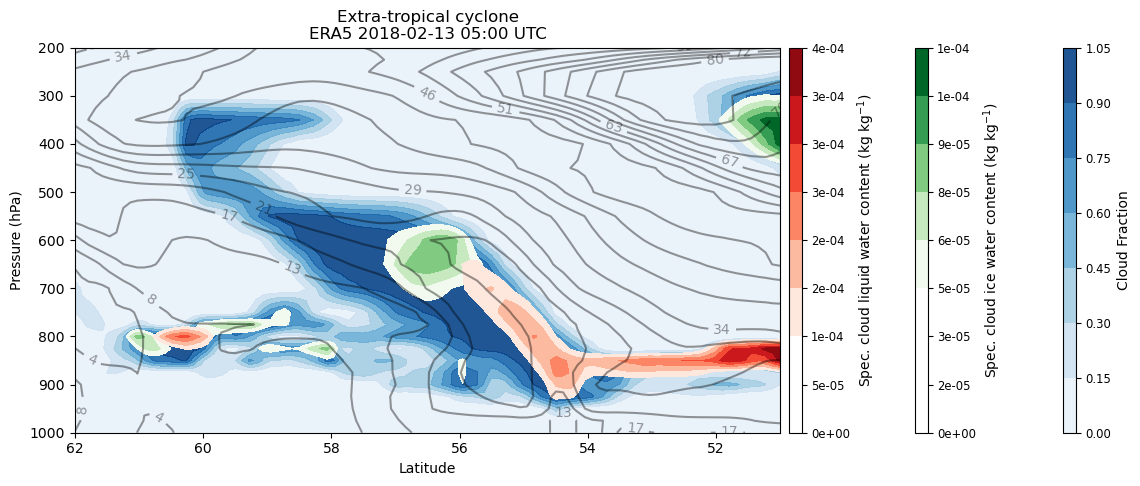

In [76]:
fig = plt.figure(1, figsize=(15., 5.))
ax = plt.axes()


cf = ax.contourf(cross['latitude'], cross['level'], cross['cc'], cmap='Blues', alpha=0.9)
cf_colorbar = fig.colorbar(cf, aspect=30, pad=0.00000001)
cf_colorbar.set_label('Cloud Fraction')
cf_colorbar.ax.tick_params(labelsize='small')

cmap = plt.get_cmap('Greens')
cmap.set_under('w', alpha=0)
ice = ax.contourf(cross['latitude'], cross['level'], cross['ciwc'], cmap=cmap, vmin=0.00005)
ice_colorbar = fig.colorbar(ice, format='%.0e', aspect=30, pad=0.00001)
ice_colorbar.set_label('Spec. cloud ice water content (kg kg$^{-1}$)')
ice_colorbar.ax.tick_params(labelsize='small')


cmap = plt.get_cmap('Reds')
cmap.set_under('w', alpha=0)
liq = ax.contourf(cross['latitude'], cross['level'], cross['clwc'], cmap=cmap, vmin=0.0001)
liq_colorbar = fig.colorbar(liq, format='%.0e', aspect=30, pad=0.01)
liq_colorbar.set_label('Spec. cloud liquid water content (kg kg$^{-1}$)')
liq_colorbar.ax.tick_params(labelsize='small')


wind_levels = np.linspace(0,80, 20)
CS = ax.contour(cross['latitude'], cross['level'], windspeed, wind_levels, colors='k', alpha=0.4)
ax.clabel(CS, CS.levels, inline=True, fontsize=10, fmt='%.f')

ax.set_ylim(200,1000)

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Latitude')
ax.set_title('Extra-tropical cyclone\nERA5 2018-02-13 05:00 UTC')

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.show()